# Problema del Puzzle Lineal 
## con busqueda en amplitud (BFS)

La ejecución del programa nos mostrará el siguiente resultado:

[[4, 2, 3, 1], [2, 4, 3, 1], [2, 3, 4, 1], [2, 3, 1, 4], [2, 1, 3, 4], [1, 2, 3, 4]]

Que es la secuencia de movimientos que realiza el programa para resolver el
puzle.


In [1]:
# Código del programa que resuelve el problema
from arbol import Nodo

# Función encargada de implementar la búsqueda en amplitud. 
def buscar_solucion_BFS(estado_inicial, solucion):
    solucionado=False
    nodos_visitados=[]
    nodos_frontera=[]
    nodoInicial = Nodo(estado_inicial)
    nodos_frontera.append(nodoInicial)
    while (not solucionado) and len(nodos_frontera)!=0:
        nodo=nodos_frontera.pop(0)
        
        # extraer nodo y añadirlo a visitados
        nodos_visitados.append(nodo)
        if nodo.get_datos() == solucion:
            # solucion encontrada
            solucionado=True
            return nodo
        else:
            # expandir nodos hijo
            dato_nodo = nodo.get_datos()

            # operador izquierdo
            hijo=[dato_nodo[1], dato_nodo[0], dato_nodo[2], dato_nodo[3]]
            hijo_izquierdo = Nodo(hijo)
            if not hijo_izquierdo.en_lista(nodos_visitados) and not hijo_izquierdo.en_lista(nodos_frontera):
                nodos_frontera.append(hijo_izquierdo)
            
            # operador central
            hijo=[dato_nodo[0], dato_nodo[2], dato_nodo[1], dato_nodo[3]]
            hijo_central = Nodo(hijo)
            if not hijo_central.en_lista(nodos_visitados) and not hijo_central.en_lista(nodos_frontera):
                nodos_frontera.append(hijo_central)
            
            # operador derecho
            hijo=[dato_nodo[0], dato_nodo[1], dato_nodo[3], dato_nodo[2]]
            hijo_derecho = Nodo(hijo)
            if not hijo_derecho.en_lista(nodos_visitados) and not hijo_derecho.en_lista(nodos_frontera):
                nodos_frontera.append(hijo_derecho)
            
            nodo.set_hijos([hijo_izquierdo, hijo_central, hijo_derecho])


La función encargada de implementar la búsqueda en amplitud se llama buscar_solucion_BFS() que es invocada con dos parámetros. El primero es el estado inicial, que en nuestro ejemplo es [4,2,3,1]. El segundo parámetro es el estado objetivo, es decir, la solución: [1,2,3,4]. La función retorna con el nodo solución si lo ha encontrado. Para conocer el camino concreto desde el nodo raíz al nodo objetivo, solo hay que recorrer el camino inverso desde el nodo objetivo. Como cada nodo tiene asignado un padre, solo tenemos que usar la función get_padre() para recorrer el camino.

Dentro de la función buscar_solucion_BFS() lo primero que se hace es inicializar las listas de nodos frontera y nodos visitados. También se crea el nodo inicial con el valor del primer parámetro de la función y se añade a la lista de nodos frontera.

La siguiente porción del código es un bucle y se repite mientras haya elementos en la lista de nodos frontera o no se haya alcanzado una solución. El primer paso es extraer el primer nodo pendiente de la cola de nodos frontera e insertarlo en la lista de elementos visitados. Si el nodo es una solución, salimos del bucle devolviendo el nodo. Si no, expandimos el nodo aplicando los operadores I, C y D, y generamos sus hijos. Si los hijos no están en la lista de nodos visitados, los añadimos a la cola de
nodos frontera.

In [2]:
# Parámetros iniciales
estado_inicial=[4,2,3,1]
solucion=[1,2,3,4]

# La función retorna el nodo solución si lo ha encontrado.
nodo_solucion = buscar_solucion_BFS(estado_inicial, solucion)

In [3]:
 # mostrar resultado
resultado=[]
nodo=nodo_solucion

while nodo.get_padre() != None:
  resultado.append(nodo.get_datos())
  nodo = nodo.get_padre()
resultado.append(estado_inicial)
resultado.reverse()
print(resultado)

[[4, 2, 3, 1], [2, 4, 3, 1], [2, 3, 4, 1], [2, 3, 1, 4], [2, 1, 3, 4], [1, 2, 3, 4]]


En el caso del puzle lineal, podríamos plantearnos que una solución será **óptima** si no es posible encontrar otra diferente que resuelva el puzle en menor número de movimientos. Si nos fijamos en el árbol de la figura, observamos que por cada movimiento bajamos un nivel en el árbol. Así pues, a cuanta menos profundidad se encuentre la solución, menos movimientos habrán sido necesarios para llegar a ella. Como la búsqueda en amplitud recorre el árbol por niveles, queda claro que, en este caso, la solución que encontremos será óptima.

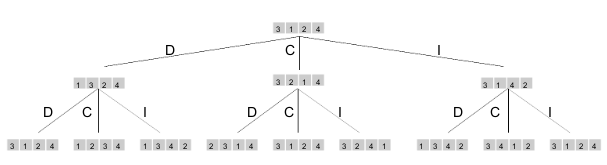